In [2]:
import logging
logging.root.handlers = []  # Jupyter messes up logging so needs a reset
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from sklearn.neighbors import KNeighborsClassifier
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

In [3]:
data = pd.read_csv('/home/nikita/PycharmProjects/natural_language/data/test_prepocess.csv')
data.head()

,stars,text,useful,funny
0,3,The good: mini doughnuts and americano friendl...,1,0
1,3,I really like the décor of the place and the w...,0,0
2,5,"Great service, clean and great food, this plac...",1,0
3,5,This place has never failed on me! \nLate nigh...,0,0
4,2,This is a fast food spin off from Paramount Fi...,1,1


In [4]:
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)
train_batch = train_data[0:10000]
test_batch = test_data[0:50000]

In [5]:
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

In [6]:
%%time
train_tagged = train_batch.apply(
    lambda r: TaggedDocument(words=tokenize_text(r.text), tags=[r.stars]), axis=1)

CPU times: user 15 s, sys: 44.7 ms, total: 15.1 s
Wall time: 15.2 s


In [7]:
%%time
test_tagged = test_batch.apply(
    lambda r: TaggedDocument(words=tokenize_text(r.text), tags=[r.stars]), axis=1)

CPU times: user 1min 13s, sys: 152 ms, total: 1min 14s
Wall time: 1min 14s


In [8]:
test_tagged.values[50]

TaggedDocument(words=['3.75', 'stars', 'this', 'place', 'does', "n't", 'really', 'qualify', 'as', 'greasy', 'spoon', 'or', 'diner', 'but', 'it', "'s", 'breakfast', 'special', 'is', 'called', '``', 'the', 'greasy', 'spoon', "''", 'so', 'it', 'counts', 'actually', 'the', '``', 'greasy', 'spoon', 'jr.', "''", 'at', '5.95', 'contains', 'xl', 'eggs', 'choice', 'of', 'side', 'home', 'fries', 'and', 'toast', "''", 'the', '``', 'greasy', 'spoon', 'sr.', "''", 'contains', 'the', 'same', 'as', 'the', 'jr', '...', '.only', 'bigger', 'makes', 'sense', 'the', 'meat', 'options', 'bacon', 'sausage', 'etc', 'qualifies', 'as', 'the', '``', 'side', "''", 'as', 'does', 'home', 'made', 'fruit', 'salad', 'which', 'had', 'nice', 'order', 'at', 'the', 'counter', 'take', 'seat', 'and', 'the', 'friendly', 'staff', 'will', 'deliver', 'your', 'food', 'coffee', 'is', 'self', 'serve', 'but', 'bottomless', 'definitely', 'more', 'of', 'cafe', 'than', 'diner', 'vibe', 'but', 'the', 'breakfast', 'fits', 'the', 'bill']

In [9]:
%%time
trainsent = train_tagged.values
testsent = test_tagged.values

# simple gensim doc2vec api
doc2vec_model = Doc2Vec(trainsent, workers=3, iter=20)

train_targets, train_regressors = zip(
    *[(doc.tags[0], doc2vec_model.infer_vector(doc.words, steps=20)) for doc in trainsent])

/home/nikita/anaconda3/lib/python3.6/site-packages/gensim/models/doc2vec.py:362: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
2018-05-07 07:38:53,939 : INFO : collecting all words and their counts
2018-05-07 07:38:53,940 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2018-05-07 07:38:54,146 : INFO : collected 35280 word types and 6 unique tags from a corpus of 10000 examples and 1106108 words
2018-05-07 07:38:54,147 : INFO : Loading a fresh vocabulary
2018-05-07 07:38:54,182 : INFO : min_count=5 retains 8902 unique words (25% of original 35280, drops 26378)
2018-05-07 07:38:54,183 : INFO : min_count=5 leaves 1065945 word corpus (96% of original 1106108, drops 40163)
2018-05-07 07:38:54,211 : INFO : deleting the raw counts dictionary of 35280 items
2018-05-07 07:38:54,213 : INFO : sample=0.001 downsamp

2018-05-07 07:39:11,339 : INFO : EPOCH 14 - PROGRESS: at 80.45% examples, 653594 words/s, in_qsize 5, out_qsize 0
2018-05-07 07:39:11,562 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-05-07 07:39:11,566 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-05-07 07:39:11,585 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-05-07 07:39:11,586 : INFO : EPOCH - 14 : training on 1106108 raw words (815297 effective words) took 1.2s, 653422 effective words/s
2018-05-07 07:39:12,595 : INFO : EPOCH 15 - PROGRESS: at 84.89% examples, 688657 words/s, in_qsize 5, out_qsize 0
2018-05-07 07:39:12,749 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-05-07 07:39:12,764 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-05-07 07:39:12,770 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-05-07 07:39:12,771 : INFO : EPOCH - 15 : training on 1106108 raw words (815801 effec

CPU times: user 1min 25s, sys: 1.32 s, total: 1min 26s
Wall time: 53.5 s


In [10]:
%%time
test_targets, test_regressors = zip(
    *[(doc.tags[0], doc2vec_model.infer_vector(doc.words, steps=20)) for doc in testsent])

CPU times: user 2min 18s, sys: 159 ms, total: 2min 18s
Wall time: 2min 18s


In [13]:
def evaluate_prediction(predictions, target, title="Confusion matrix"):
    print('accuracy %s' % accuracy_score(target, predictions))
    cm = confusion_matrix(target, predictions)
    print('confusion matrix\n %s' % cm)
    print('(row=expected, col=predicted)')
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized, title + ' Normalized')
    
def plot_confusion_matrix(cm, title='Матрица ошибок', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    my_tags = pd.unique(data.stars)
    tick_marks = np.arange(len(my_tags))
    target_names = my_tags
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('Исходные метки')
    plt.xlabel('Полученные метки')

def predict(vectorizer, classifier, data):
    data_features = vectorizer.transform(data.text)
    predictions = classifier.predict(data_features)
    target = data.stars
    evaluate_prediction(predictions, target)

accuracy 0.5019
confusion matrix
 [[ 3414   507   378   773  1802]
 [ 1131   505   589   716  1115]
 [  719   473   831  1694  2205]
 [  564   372   819  3144  6809]
 [  716   227   470  2826 17201]]
(row=expected, col=predicted)
CPU times: user 1.68 s, sys: 24.1 ms, total: 1.7 s
Wall time: 1.79 s


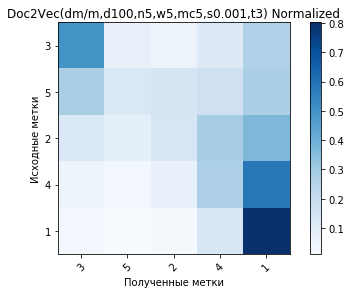

In [14]:
%%time
logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(train_regressors, train_targets)
evaluate_prediction(logreg.predict(test_regressors), test_targets, title=str(doc2vec_model))